In [17]:
import json
from shapely.ops import cascaded_union
from rasterio.plot import plotting_extent
import pandas as pd
from shapely.geometry import Polygon
import geopandas as gpd
import os

In [6]:
path = os.getcwd()

In [7]:
path

'/Users/user/Documents/GitHub/canopy-gis/processing'

In [8]:
df_labels = pd.read_csv("/Users/user/Documents/GitHub/canopy-gis/data_collection/data/labelled/labels_Misha_v2.csv")
df_labels = df_labels[["center-lat","center-long","polygon"]][0:33]

In [71]:
polygons = []
for polygon in df_labels["polygon"]:
    polygon_temp = []
    for coordinates in json.loads(polygon)["coordinates"]:
        for coordinate in coordinates:
            polygon_temp.append(tuple(coordinate))
        polygons.append(Polygon(polygon_temp))


In [83]:
boundary = gpd.GeoSeries(cascaded_union(polygons))

<AxesSubplot:>

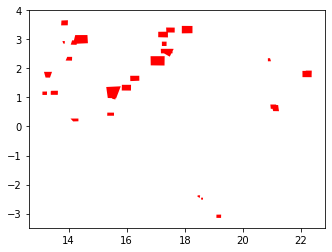

In [84]:
boundary.plot(color = 'red')

In [86]:
boundary

0    MULTIPOLYGON (((19.09029 -3.03715, 19.25251 -3...
dtype: geometry

In [87]:
boundary.to_file("/Users/user/Documents/GitHub/canopy-gis/data_collection/data/labelled/labels_v1.shp")